In [2]:
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


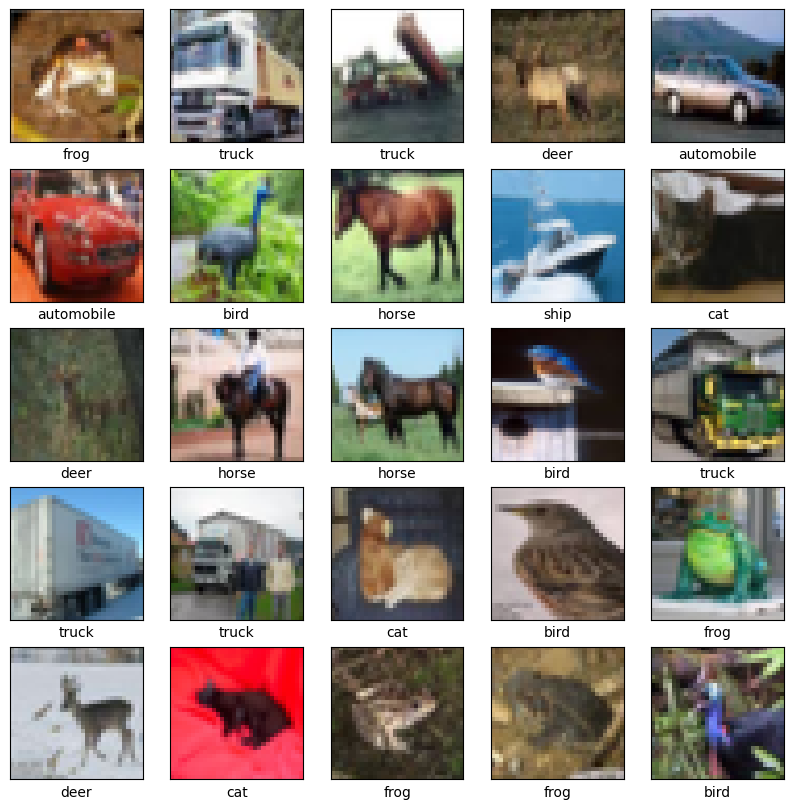

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot some sample images from the training data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [8]:
model = keras.models.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
  keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True)
]


epochs = 200
batch_size = 64

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size= batch_size,
                    validation_split=0.20,
                    callbacks=callbacks)

Epoch 1/200
625/625 [==============================] - 8s 6ms/step - loss: 1.5449 - accuracy: 0.4437 - val_loss: 1.3054 - val_accuracy: 0.5397
Epoch 2/200
 22/625 [>.............................] - ETA: 3s - loss: 1.2895 - accuracy: 0.5447

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 3s 5ms/step - loss: 1.2143 - accuracy: 0.5699 - val_loss: 1.1755 - val_accuracy: 0.5892
Epoch 3/200
625/625 [==============================] - 4s 7ms/step - loss: 1.0719 - accuracy: 0.6244 - val_loss: 1.1080 - val_accuracy: 0.6204
Epoch 4/200
625/625 [==============================] - 6s 9ms/step - loss: 0.9808 - accuracy: 0.6564 - val_loss: 1.0032 - val_accuracy: 0.6542
Epoch 5/200
625/625 [==============================] - 4s 7ms/step - loss: 0.9032 - accuracy: 0.6889 - val_loss: 0.9763 - val_accuracy: 0.6675
Epoch 6/200
625/625 [==============================] - 3s 4ms/step - loss: 0.8459 - accuracy: 0.7058 - val_loss: 1.0184 - val_accuracy: 0.6478
Epoch 7/200
625/625 [==============================] - 3s 5ms/step - loss: 0.8035 - accuracy: 0.7216 - val_loss: 0.9665 - val_accuracy: 0.6702
Epoch 8/200
625/625 [==============================] - 4s 6ms/step - loss: 0.7506 - accuracy: 0.7397 - val_loss: 0.9406 - val_accuracy: 0.6808
Epoch 9/200

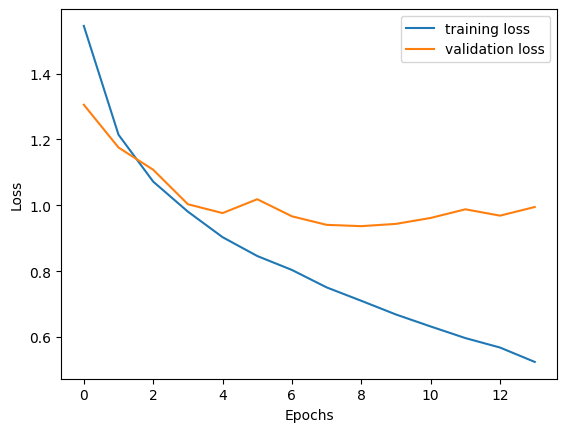

In [14]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
model = keras.models.load_model('best_model.h5')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9385 - accuracy: 0.6854 - 892ms/epoch - 3ms/step

Test accuracy: 0.6854000091552734


In [16]:
# No call backs

model = keras.models.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model.summary()


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
  keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True)
]


epochs = 100
batch_size = 64

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size= batch_size,
                    validation_split=0.20
                    )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

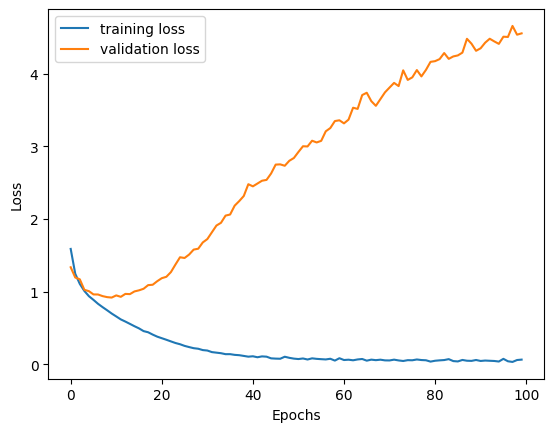

In [17]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 4.4861 - accuracy: 0.6487 - 686ms/epoch - 2ms/step

Test accuracy: 0.6486999988555908


In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
print(model.summary())

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

None


In [20]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size= batch_size,
                    validation_split=0.20
                    )

Epoch 1/100
625/625 [==============================] - 10s 10ms/step - loss: 1.8932 - accuracy: 0.2929 - val_loss: 1.6063 - val_accuracy: 0.4266
Epoch 2/100
625/625 [==============================] - 6s 9ms/step - loss: 1.4931 - accuracy: 0.4492 - val_loss: 1.2775 - val_accuracy: 0.5328
Epoch 3/100
625/625 [==============================] - 6s 9ms/step - loss: 1.2908 - accuracy: 0.5341 - val_loss: 1.1118 - val_accuracy: 0.6060
Epoch 4/100
625/625 [==============================] - 6s 10ms/step - loss: 1.1471 - accuracy: 0.5914 - val_loss: 1.0609 - val_accuracy: 0.6144
Epoch 5/100
625/625 [==============================] - 6s 9ms/step - loss: 1.0256 - accuracy: 0.6363 - val_loss: 0.9003 - val_accuracy: 0.6824
Epoch 6/100
625/625 [==============================] - 6s 9ms/step - loss: 0.9380 - accuracy: 0.6688 - val_loss: 0.8312 - val_accuracy: 0.7118
Epoch 7/100
625/625 [==============================] - 6s 9ms/step - loss: 0.8695 - accuracy: 0.6921 - val_loss: 0.7770 - val_accuracy: 0.7

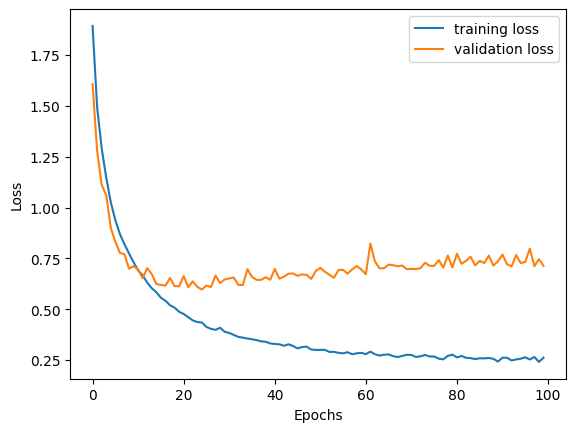

In [21]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7340 - accuracy: 0.8094 - 1s/epoch - 5ms/step

Test accuracy: 0.8094000220298767
